In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
df.sample(4)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
272,273,294,95,1,1.5,1.5,7.64,0,0.49
99,100,323,113,3,4.0,4.0,8.88,1,0.79
369,370,301,98,1,2.0,3.0,8.03,1,0.67
163,164,317,105,3,3.5,3.0,8.56,0,0.68


In [5]:
df.shape

(400, 9)

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())

In [11]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [12]:
df.drop(columns=['Serial No.'],inplace=True)

In [13]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


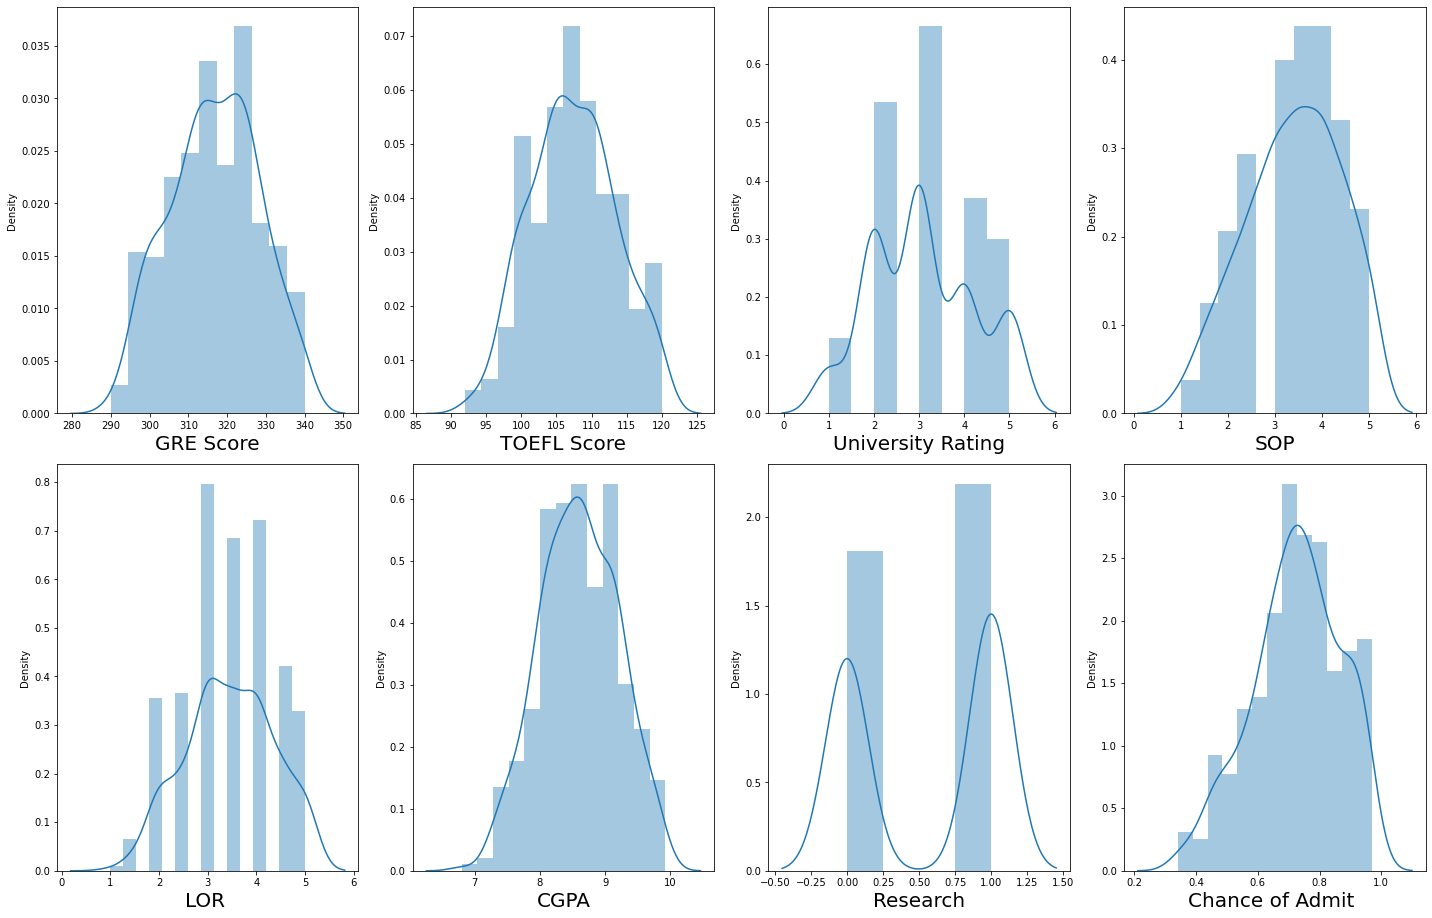

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

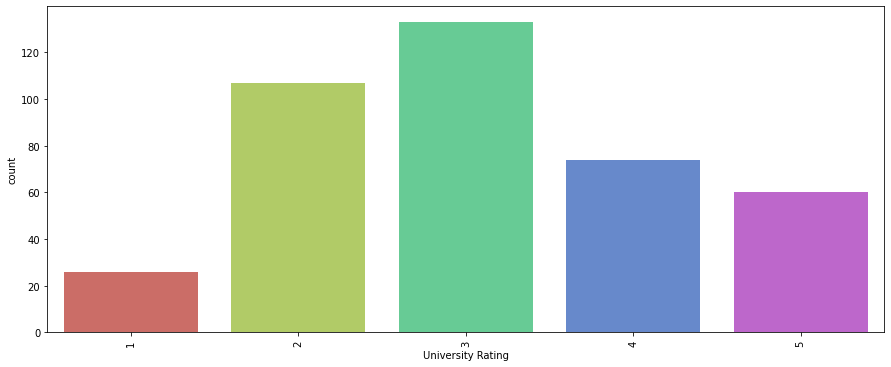

In [15]:
plt.figure(figsize=(15,6))
sns.countplot('University Rating', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

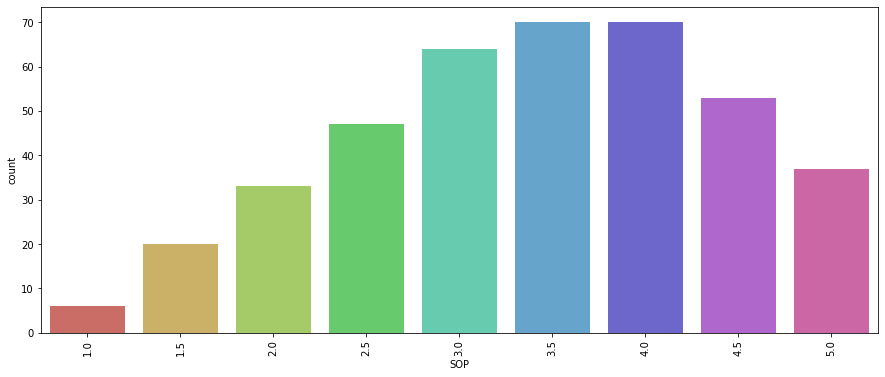

In [16]:
plt.figure(figsize=(15,6))
sns.countplot('SOP', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

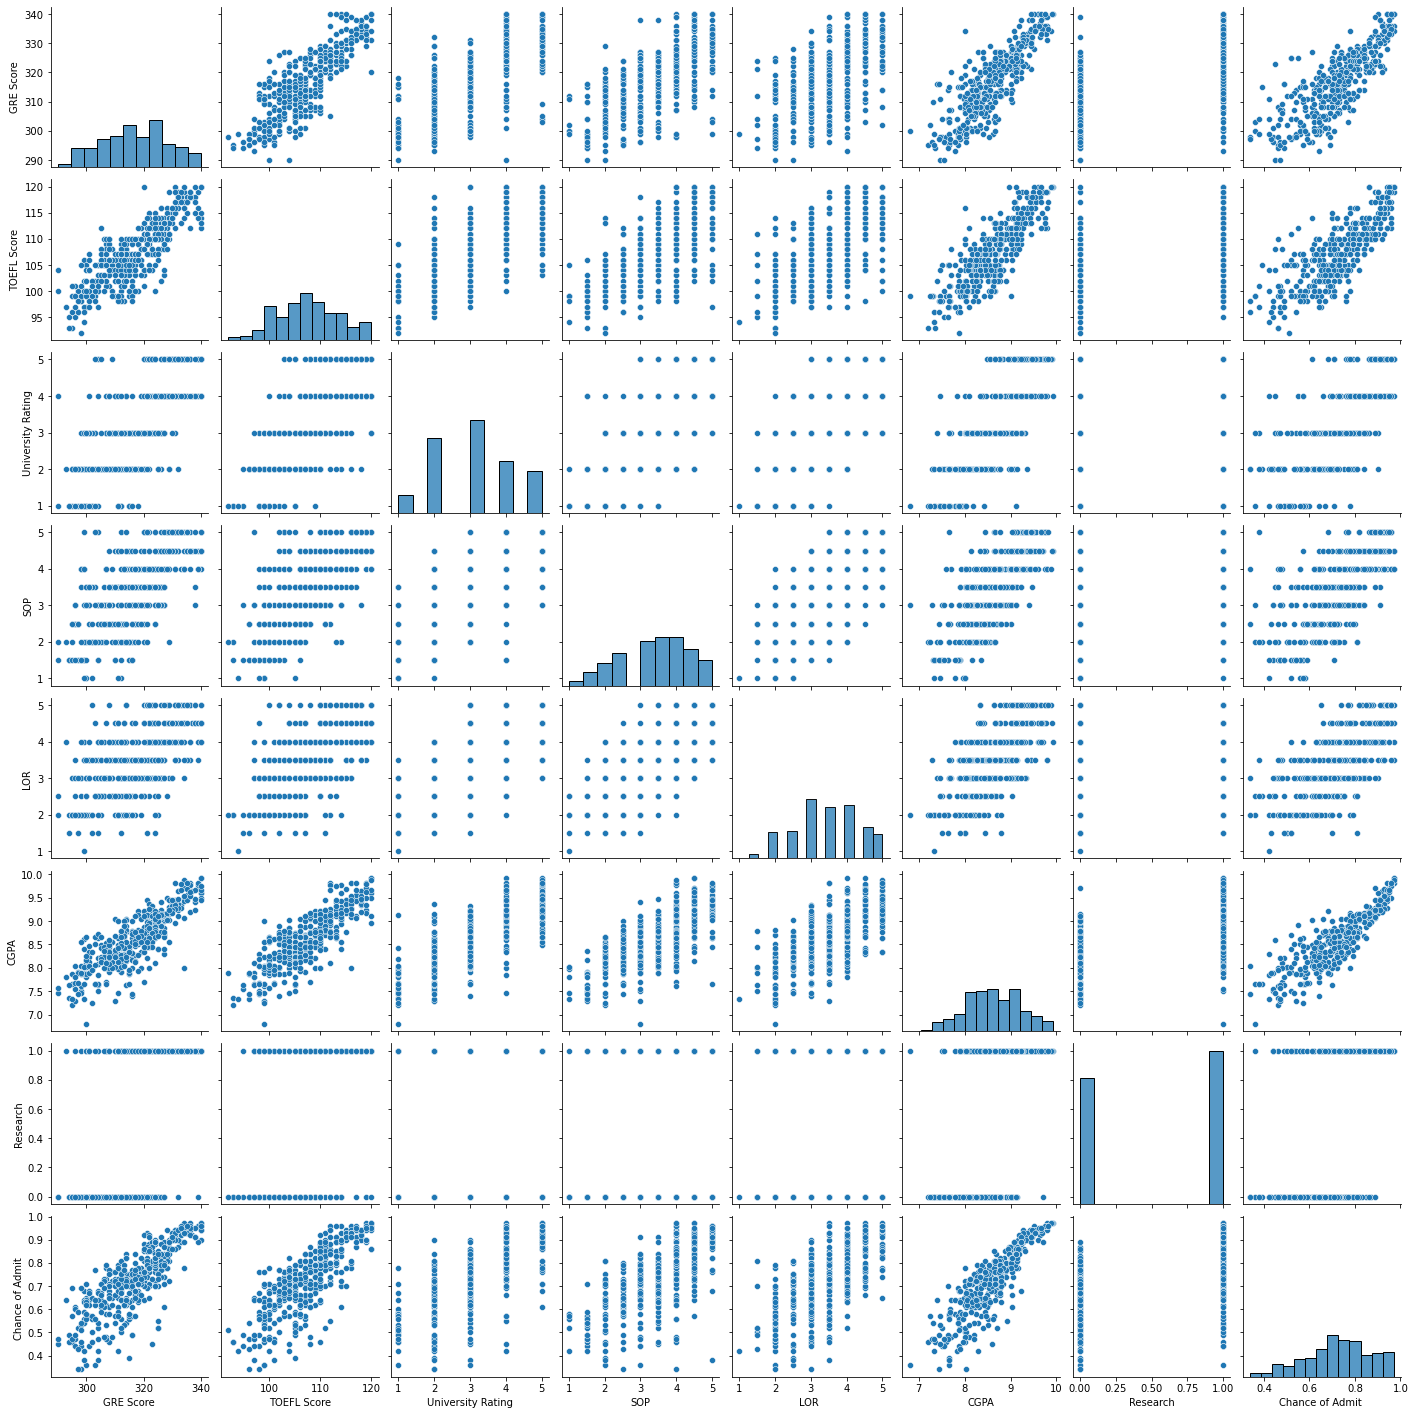

In [17]:
sns.pairplot(df)

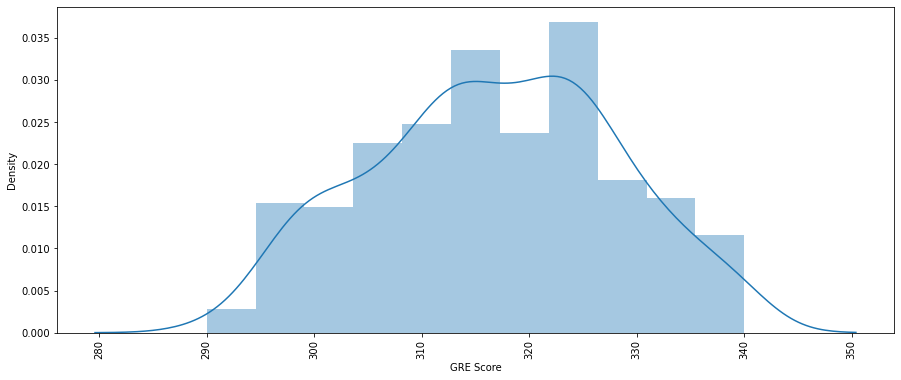

In [18]:
plt.figure(figsize=(15,6))
sns.distplot(df['GRE Score'])
plt.xticks(rotation = 90)
plt.show()

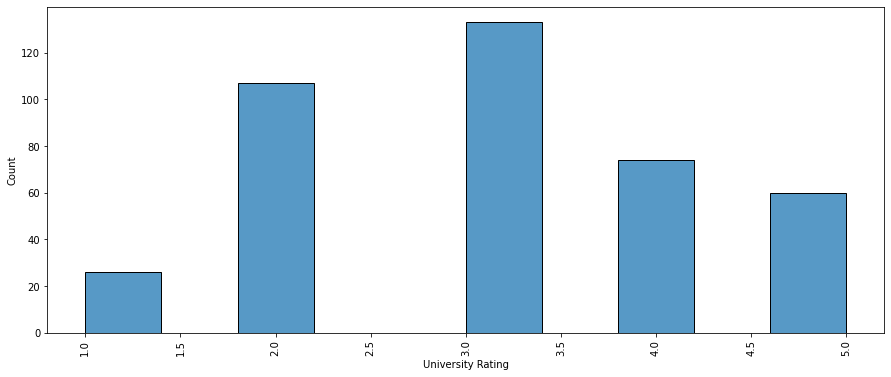

In [19]:
plt.figure(figsize=(15,6))
sns.histplot(df['University Rating'])
plt.xticks(rotation = 90)
plt.show()

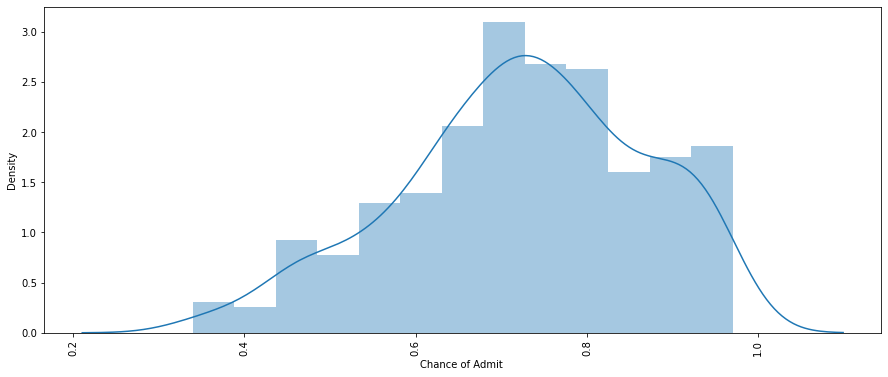

In [20]:
plt.figure(figsize=(15,6))
sns.distplot(df['Chance of Admit '])
plt.xticks(rotation = 90)
plt.show()

In [22]:
corrmat = df.corr()
corrmat

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

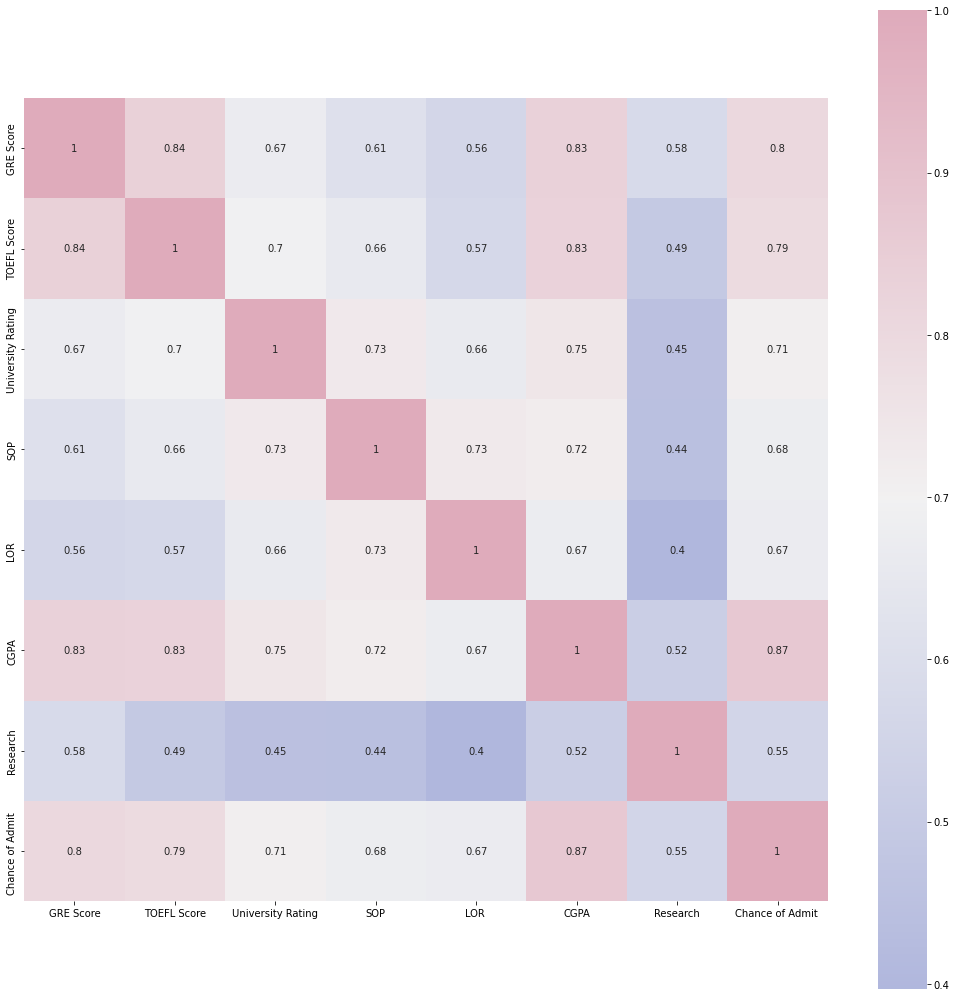

In [23]:
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

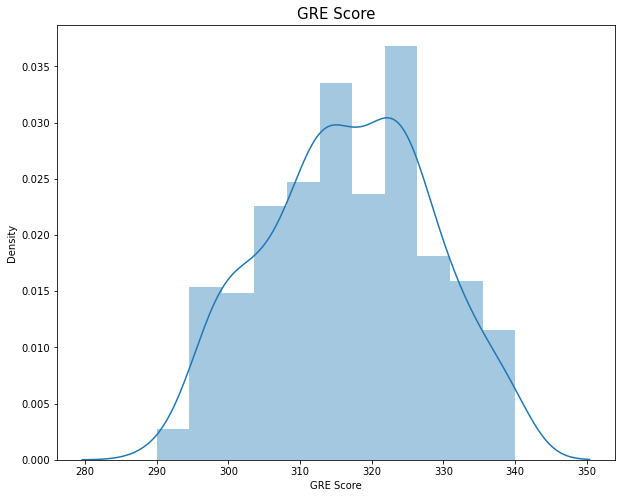

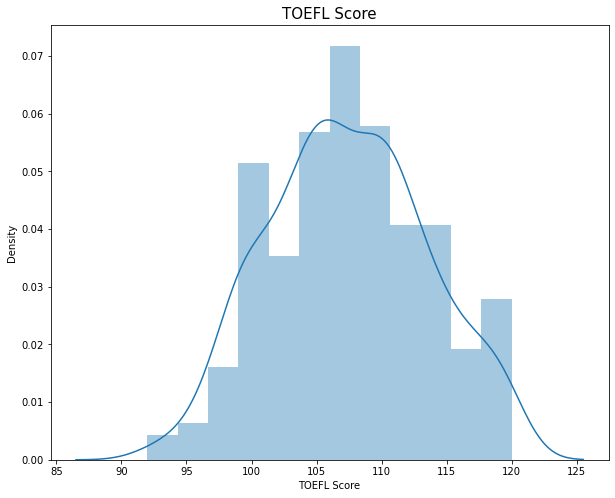

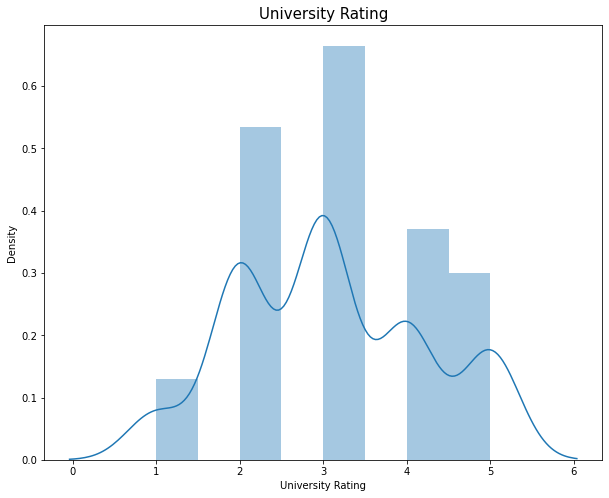

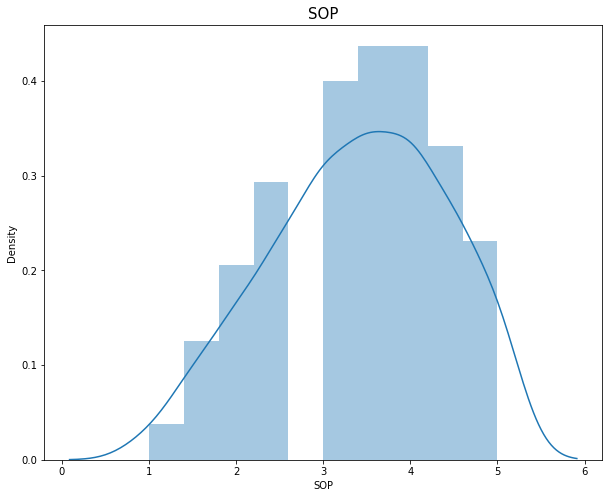

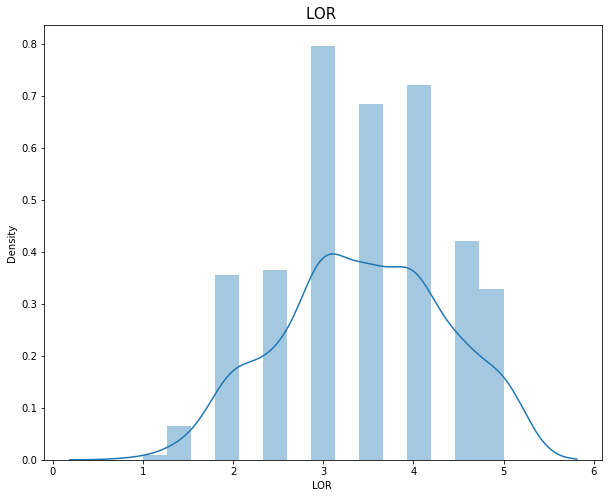

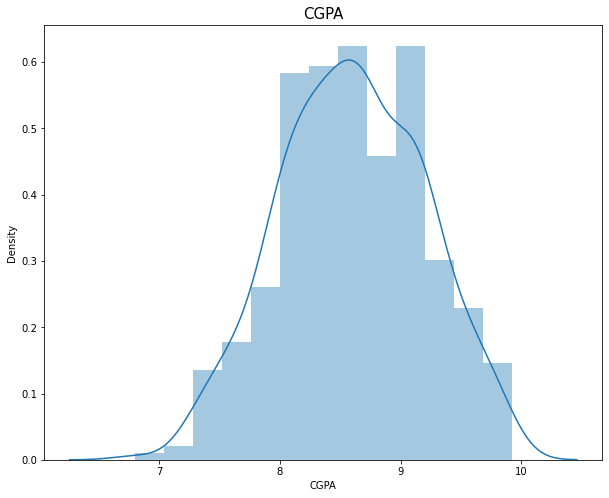

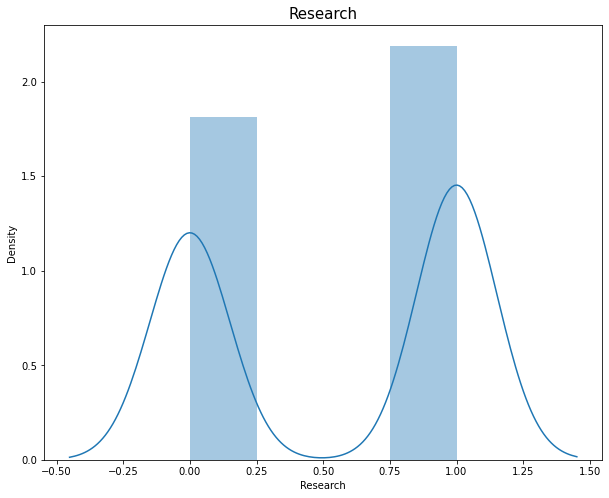

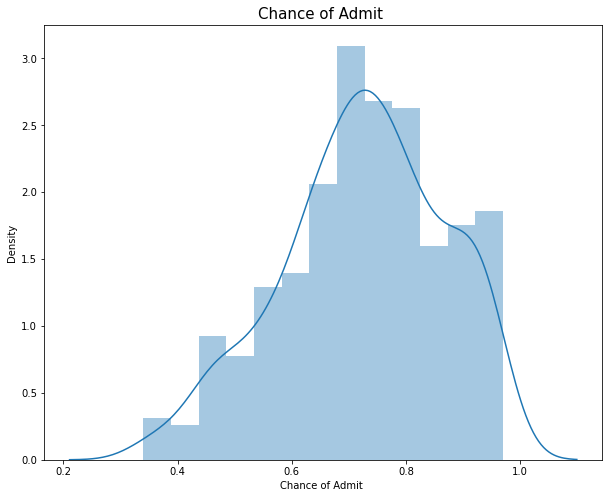

In [24]:
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

In [26]:
df.rename(columns={"LOR ": "LOR", "Chance of Admit ": "Chance of Admit"}, inplace=True)

<Figure size 720x576 with 0 Axes>

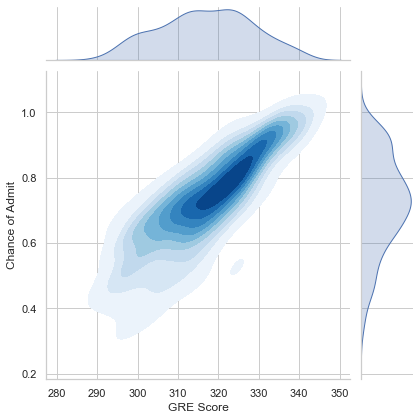

<Figure size 720x576 with 0 Axes>

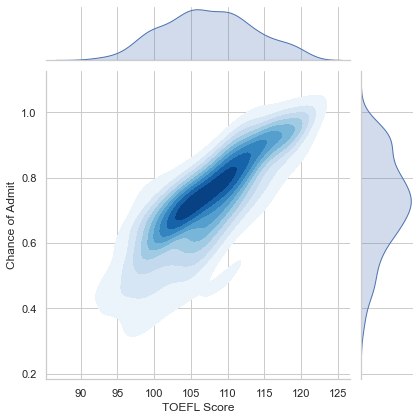

<Figure size 720x576 with 0 Axes>

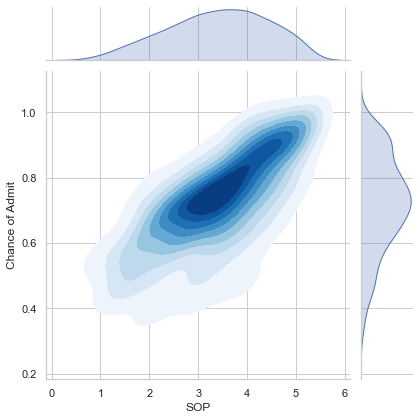

<Figure size 720x576 with 0 Axes>

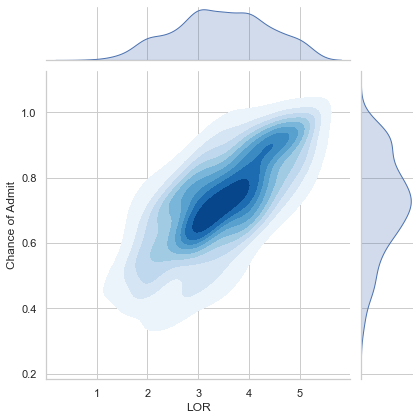

<Figure size 720x576 with 0 Axes>

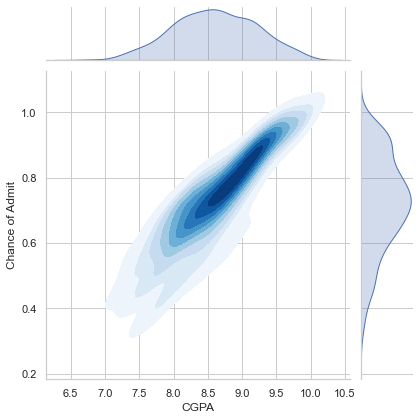

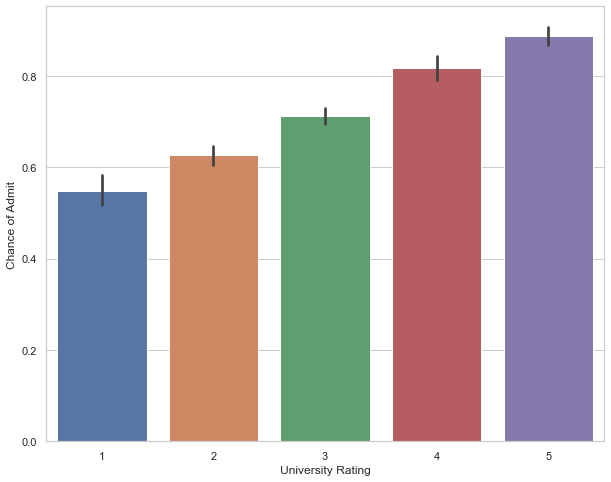

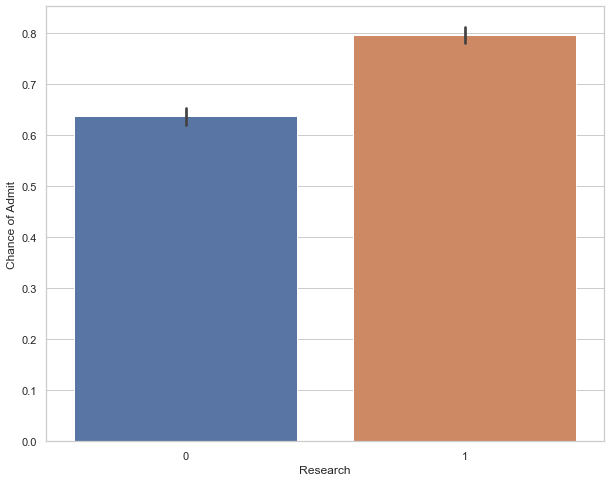

In [27]:
sns.set(style="whitegrid")

num_cols = df.drop(["University Rating", "Research", "Chance of Admit"], axis=1).columns
cat_cols = df[["University Rating", "Research"]].columns

for col in num_cols:
    plt.figure(figsize=(10,8))
    sns.jointplot(x=df[col], y=df["Chance of Admit"], kind="kde", cmap="Blues", fill=True)
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot(x=df[col], y=df["Chance of Admit"])
    plt.show()

In [30]:
X = df.drop("Chance of Admit", axis=1)
y = df["Chance of Admit"]

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from lightgbm import LGBMRegressor

In [33]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
def evaluate(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

In [36]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "R2 Score", "RMSE (Cross-Validated)"])

# Linear Regression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "LinearRegression", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.04947838710419591
MSE: 0.0046528218464813
R2 Score: 0.7955991554684618
RMSE (Cross-Validated) 0.06621644707998611


# Lasso (L1 Regularization)

In [38]:
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Lasso", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.12338095238095237
MSE: 0.023164175170068028
R2 Score: -0.017614068163618102
RMSE (Cross-Validated) 0.14181845848513722


# Ridge (L2 Regularization)

In [39]:
ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(ridge)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Ridge", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.04950164989590387
MSE: 0.0046568041097050485
R2 Score: 0.795424212607347
RMSE (Cross-Validated) 0.06619750061330942


# Elastic Net

In [40]:
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(elastic_net)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "ElasticNet", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.12338095238095237
MSE: 0.023164175170068028
R2 Score: -0.017614068163618102
RMSE (Cross-Validated) 0.14181845848513722


# Polynomial Regression (degree=2)

In [41]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_2d, y_train)
predictions = poly_reg.predict(X_test_2d)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(poly_reg)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "PolynomialRegression(degree=2)", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.04791301124013024
MSE: 0.004626021389744731
R2 Score: 0.796776513246501
RMSE (Cross-Validated) 0.06621644707998611


# LightGBM Regressor

In [42]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lgbm)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "LGBMRegressor", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.05433953320463249
MSE: 0.005664704977212836
R2 Score: 0.7511466117620746
RMSE (Cross-Validated) 0.07407475657641897


In [43]:
models.sort_values(by="RMSE (Cross-Validated)")

,Model,MAE,MSE,R2 Score,RMSE (Cross-Validated)
2,Ridge,0.049502,0.004657,0.795424,0.066198
0,LinearRegression,0.049478,0.004653,0.795599,0.066216
4,PolynomialRegression(degree=2),0.047913,0.004626,0.796777,0.066216
5,LGBMRegressor,0.05434,0.005665,0.751147,0.074075
1,Lasso,0.123381,0.023164,-0.017614,0.141818
3,ElasticNet,0.123381,0.023164,-0.017614,0.141818


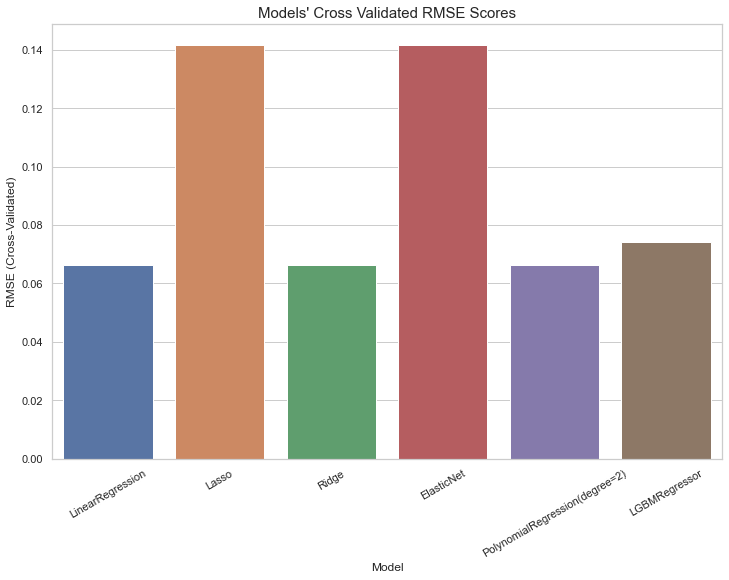

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validated)"])
plt.title("Models' Cross Validated RMSE Scores", size=15)
plt.xticks(rotation=30)
plt.show()

# Hyperparameter Tuning

In [45]:
tuned_models = pd.DataFrame(columns=["Model", "MAE", "MSE", "R2 Score", "RMSE (Cross-Validated)"])

In [46]:
param_grid_lasso = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "random_state": [42]}

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [47]:
lasso_params = grid_lasso.best_params_

lasso = Lasso(**lasso_params)
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Lasso", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.04977358491009864
MSE: 0.004712367947088617
R2 Score: 0.7929832647994691
RMSE (Cross-Validated) 0.06607847808535092


In [48]:
param_grid_ridge = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "random_state": [42]}

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [49]:
ridge_params = grid_ridge.best_params_

ridge = Ridge(**ridge_params)
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(ridge)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Ridge", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.049704265928977504
MSE: 0.004702924042039327
R2 Score: 0.793398140380663
RMSE (Cross-Validated) 0.0661581354387701


In [50]:
param_grid_elasticnet = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         "l1_ratio": np.arange(0, 1, 0.05), 
                         "random_state": [42]}

grid_elasticnet = GridSearchCV(ElasticNet(), param_grid_elasticnet, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [51]:
elasticnet_params = grid_elasticnet.best_params_

elastic_net = ElasticNet(**elasticnet_params)
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(elastic_net)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "ElasticNet", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.04983846679259674
MSE: 0.004723042179571694
R2 Score: 0.7925143403045593
RMSE (Cross-Validated) 0.06608565934809928


In [52]:
param_grid_lgbm = {"num_leaves": [2, 3, 5, 7],
                   "learning_rate": [0.01, 0.05],
                   "n_estimators": [200, 500, 1000, 5000],
                   "max_bin": [100, 150, 200],
                   "random_state": [42]}

grid_lgbm = GridSearchCV(LGBMRegressor(), param_grid_lgbm, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_bin': [100, 150, 200],
                         'n_estimators': [200, 500, 1000, 5000],
                         'num_leaves': [2, 3, 5, 7], 'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [53]:
lgbm_params = grid_lgbm.best_params_

lgbm = LGBMRegressor(**lgbm_params)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lgbm)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "LGBMRegressor", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.05129780213687021
MSE: 0.005322356338099867
R2 Score: 0.7661861626556541
RMSE (Cross-Validated) 0.0682686423093464


# Model Comparison

In [54]:
tuned_models.sort_values(by="RMSE (Cross-Validated)")

,Model,MAE,MSE,R2 Score,RMSE (Cross-Validated)
0,Lasso,0.049774,0.004712,0.792983,0.066078
2,ElasticNet,0.049838,0.004723,0.792514,0.066086
1,Ridge,0.049704,0.004703,0.793398,0.066158
3,LGBMRegressor,0.051298,0.005322,0.766186,0.068269


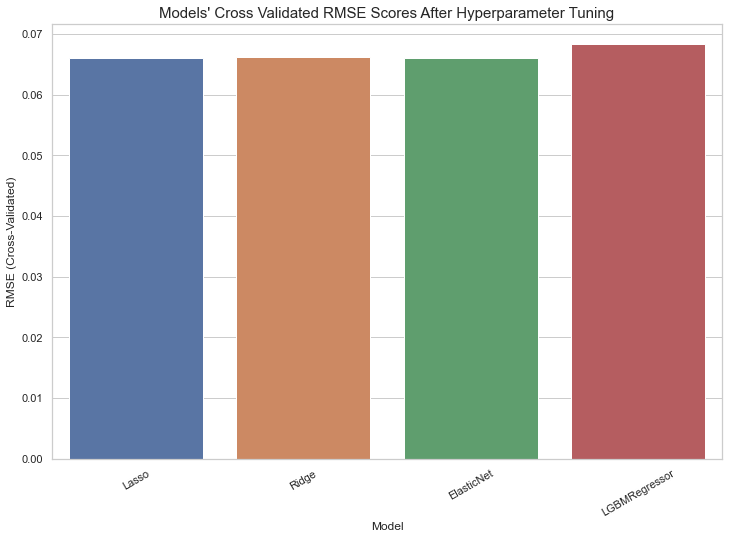

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(x=tuned_models["Model"], y=tuned_models["RMSE (Cross-Validated)"])
plt.title("Models' Cross Validated RMSE Scores After Hyperparameter Tuning", size=15)
plt.xticks(rotation=30)
plt.show()

# Conclusion

Since the Lasso model is yielding relatively less RMSE score after Hyperparameter Tuning, the winner in this comparison is Lasso (L1 Regularization).

# THANK YOU